# Analyse Exploratoire

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_style("ticks")

In [2]:
df=pd.read_csv("../Data_Collection/data.csv",index_col=0)

In [3]:
df

,Place,Bib,Name,Gender,Age,Laps,Last Loop,Miles,RaceTime,Lap#1,...,Lap#99,Lap#100,Lap#101,Lap#102,Lap#103,Lap#104,Lap#105,Lap#106,Lap#107,Lap#108
1,1.,5,Harvey Lewis,M,47,108,2851,450.00,94:16:36,3074,...,3228.0,3264.0,3304.0,3267.0,3261.0,3245.0,3266.0,3182.0,3031.0,2851.0
2,DNC,24,Ihor Verys,M,29,107,3151,445.83,90:44:04,3216,...,2900.0,3113.0,3018.0,3234.0,3029.0,2919.0,2959.0,3089.0,3151.0,NaN
3,RTC,32,Bartosz Fudali,M,35,103,3205,429.16,80:26:55,2937,...,3106.0,3176.0,3142.0,3235.0,3205.0,NaN,NaN,NaN,NaN,NaN
4,DNC,13,Terumichi Morishita,M,43,101,3520,420.83,81:50:09,2741,...,3333.0,3336.0,3520.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,DNC,1,Phil Gore,M,37,100,3525,416.66,77:17:47,3092,...,3295.0,3525.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,OVER,35,Patryk Swietochowski,M,18,25,3320,104.16,21:08:19,2990,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72,OVER,71,Van Da Bui,M,45,24,2747,100.00,17:48:18,2462,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73,RTC,72,Rene Romualdo Cunha,M,44,23,2907,95.83,16:21:39,2550,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74,OVER,47,Fabrice Puaud,M,55,10,3418,41.66,8:23:05,2877,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Nous savons que les tours 1 à 11 sont sur le chemin en forêt et les tours 12 à 24 sont sur la route.

In [4]:
is_trail=[1 if (i-1)%24<11 else 0 for i in range (1,109)]   #is_trail=1 si le chemin est en forêt

Nous allons commencer par afficher les temps au tour de quelques athlètes en faisant la distinction entre chemin et route.

In [5]:
def plot_rider_times(pos,ax=None):
    if ax==None:
        fig, ax = plt.subplots(figsize=(8, 5))
    sns.scatterplot(x=range(1,109), y=df.iloc[pos-1,9:117]/60, hue=is_trail, legend=False,ax=ax)

    # Formatting the plot
    ax.set_xlabel("Numéro du tour")
    ax.set_ylabel("Temps au tour")
    ax.set(ylim=(30, 60))
    
    ax.set_title(f"Temps au tour du coureur en position {pos}")
    #plt.legend(title="Category (0 or 1)")
    
    

In [6]:
def plot_multiple_rider_times(list_):
    n=len(list_)
    fig, axes = plt.subplots((n+1)//2, 2, figsize=(12, 6*((n+1)//2)))
    axes = axes.flatten()
    for i in range(n):
        plot_rider_times(list_[i],axes[i])

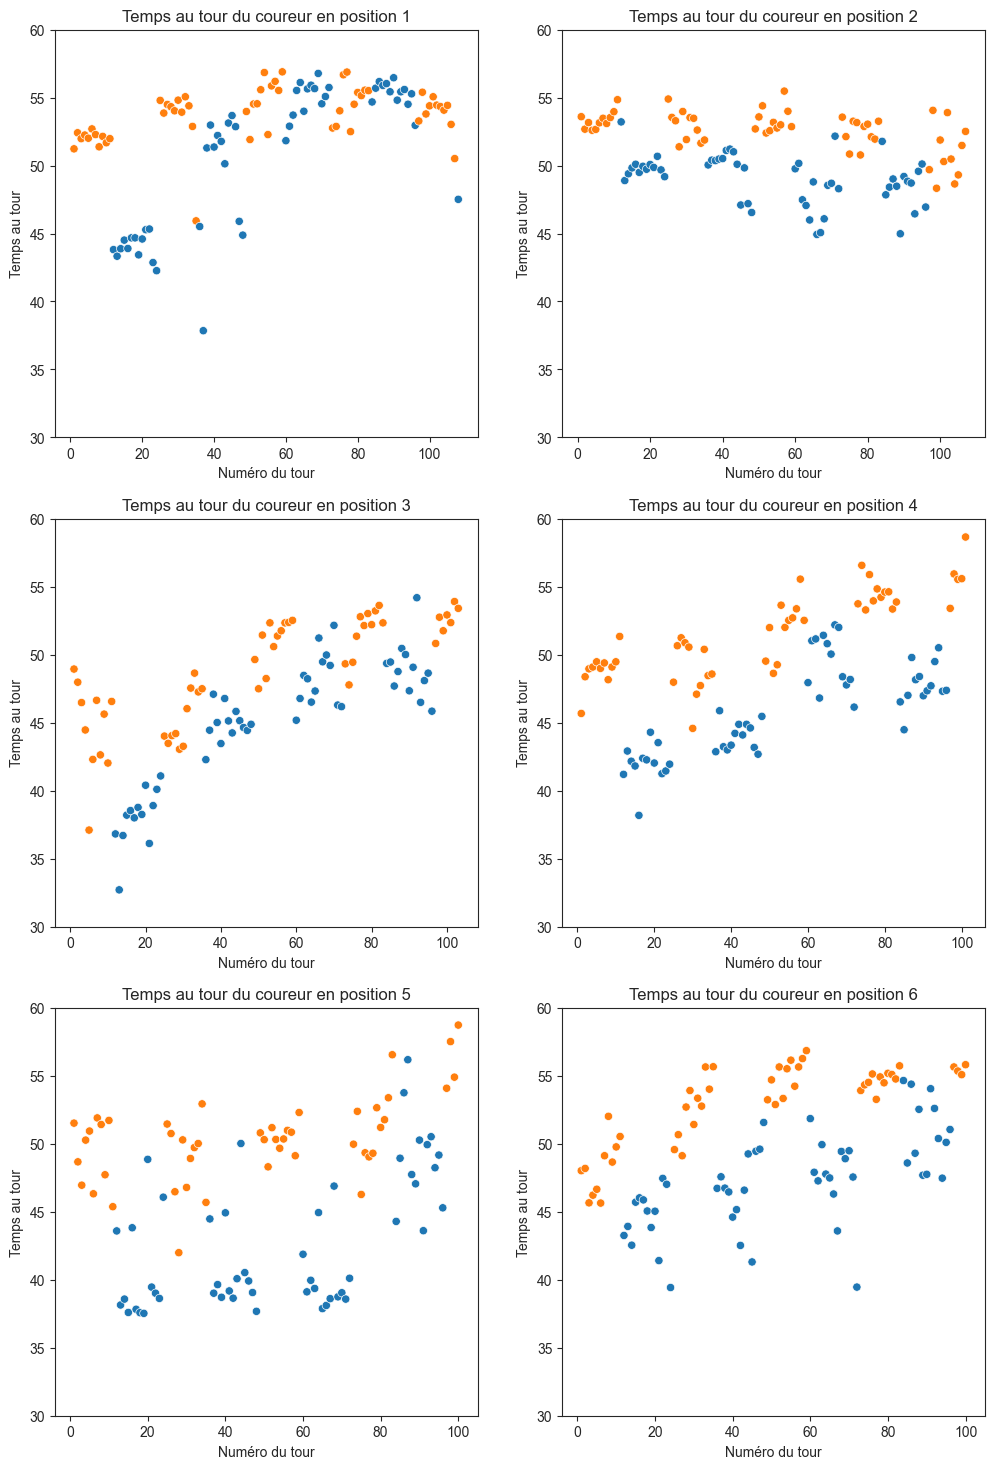

In [7]:
plot_multiple_rider_times([1,2,3,4,5,6])

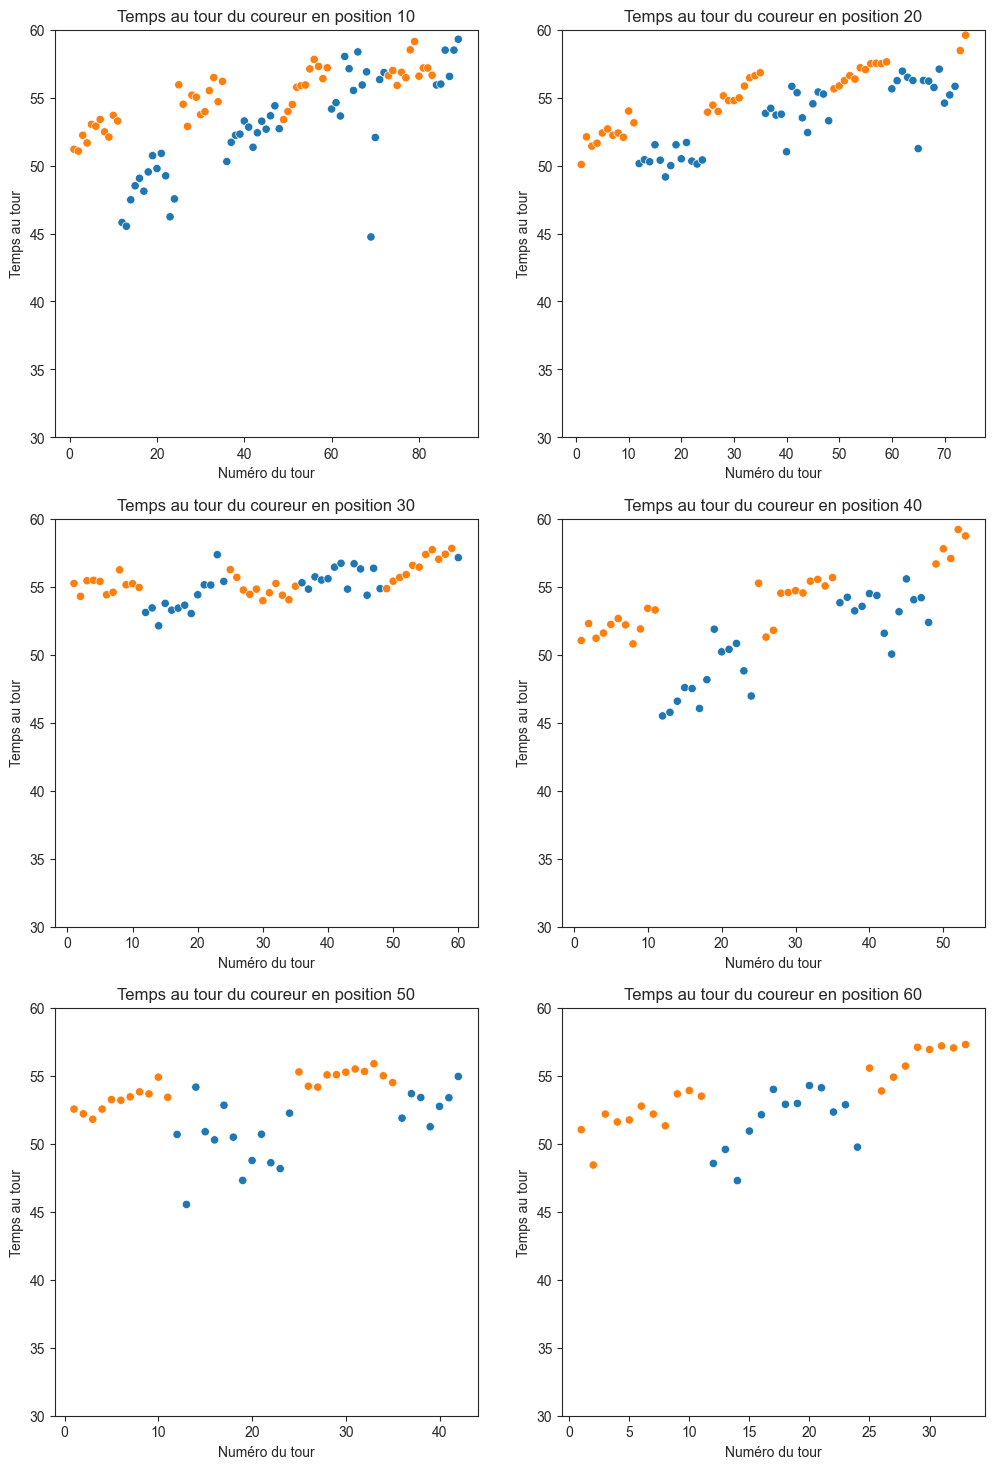

In [8]:
plot_multiple_rider_times([10,20,30,40,50,60])

On remarque que les stratégies sont très différentes. Certains sont très réguliers sur chaque "bloc" de tours, et d'autres ne le sont pas du tout.

Le graphique le plus insolite est celui réalisé par le coureur Visa Kivinen, arrivé en 61ème position avec 31 tours. On remarque qu'il a été assez régulier, sauf pour le tour numéro 11 où il a réalisé le meilleur temps absolu des différentes boucles, et ça sur le tour en forêt comportant plus de dénivelé ! Un temps de 30:48 sur 6,7 km avec 150m de dénivelé après avoir couru pendant près de 10 heures, sachant qu'il a enchainé ensuite avec 20 tours, c'est une belle performance !

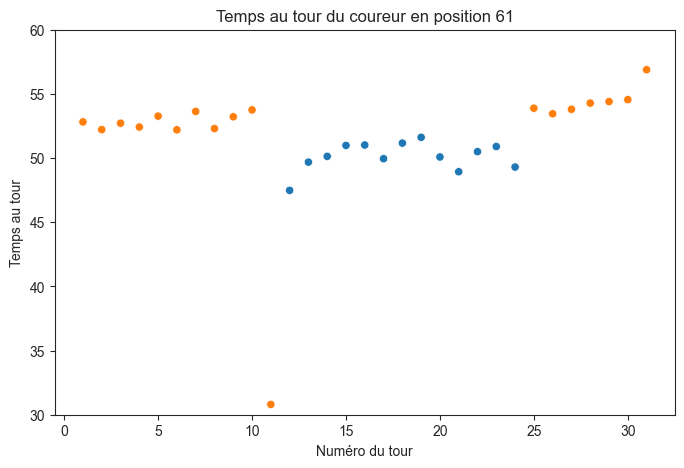

In [9]:
plot_rider_times(61)

Le meilleur temps sur route a été realisé par le coureur arrivé en troisième position, Bartosz Fudali, qui a été très rapide la première nuit comparé aux autres concurrents.

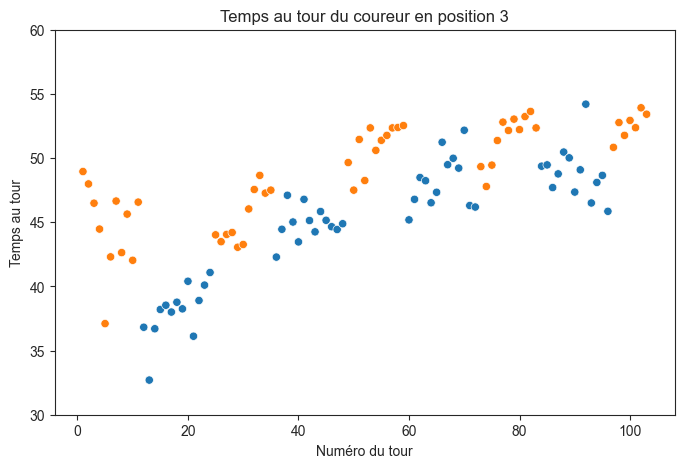

In [10]:
plot_rider_times(3)

## Calcul des moyennes et écart-types

On calcule maintenant les moyennes totales (en différenciant chemin et route) et les écart-types ainsi que les moyennes et écart-types sur chaque jour et chaque nuit.

In [11]:
mean_trail=[]
mean_road=[]
std_trail=[]
std_road=[]
mean_day_1=[]
std_day_1=[]
mean_night_1=[]
std_night_1=[]
mean_day_2=[]
std_day_2=[]
mean_night_2=[]
std_night_2=[]
mean_day_3=[]
std_day_3=[]
mean_night_3=[]
std_night_3=[]

cuts=[0,11,24,35,48,59,72]
lists=[mean_day_1,std_day_1,mean_night_1,std_night_1,mean_day_2,std_day_2,mean_night_2,std_night_2,mean_day_3,std_day_3,mean_night_3,std_night_3]

for pos in range(1,76):
    arr_trail=(np.array(df.iloc[pos-1,9:117]/60,dtype="float")[np.array(is_trail)==1])
    clean_arr_trail = arr_trail[~np.isnan(arr_trail)]
    arr_road=(np.array(df.iloc[pos-1,9:117]/60,dtype="float")[np.array(is_trail)==0])
    clean_arr_road = arr_road[~np.isnan(arr_road)]
    mean_trail.append(clean_arr_trail.mean())
    std_trail.append(clean_arr_trail.std())
    if pos<=73:
        mean_road.append(clean_arr_road.mean())
        std_road.append(clean_arr_road.std())
    else:                                            #last two riders didn't make it to the road laps
        mean_road.append(np.nan)
        std_road.append(np.nan)


    full_laps=np.array(df.iloc[pos-1,9:117]/60,dtype="float")
    for i in range(6):
        laps=full_laps[cuts[i]:cuts[i+1]]
        if np.isnan(laps).all():                      # if no laps recorded
            lists[2*i].append(np.nan)
            lists[2*i+1].append(np.nan)
        else:
            lists[2*i].append(np.nanmean(laps))
            lists[2*i+1].append(np.nanstd(laps))
        
lists=[mean_trail,std_trail,mean_road,std_road]+lists
            

In [12]:
col_names=["mean_trail","std_trail","mean_road","std_road","mean_day_1","std_day_1","mean_night_1","std_night_1","mean_day_2","std_day_2","mean_night_2","std_night_2","mean_day_3","std_day_3","mean_night_3","std_night_3"]
df[col_names]=pd.DataFrame(lists).transpose()
df["std_combined"]=(df["std_trail"]+df["std_road"])/2                          #mean of the two measured std

# Visualisation des moyennes et écart-types

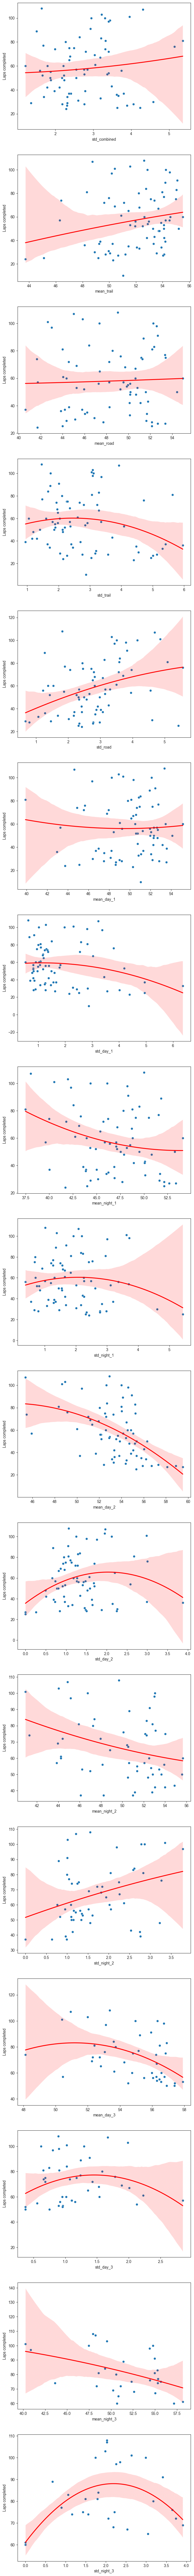

In [13]:
col_names=["std_combined","mean_trail","mean_road","std_trail","std_road","mean_day_1","std_day_1","mean_night_1","std_night_1","mean_day_2","std_day_2","mean_night_2","std_night_2","mean_day_3","std_day_3","mean_night_3","std_night_3"]

n=len(col_names)
fig, axes = plt.subplots(n, 1, figsize=(8, 7 * n))
for i,col in enumerate(col_names):
    ax=axes[i]
    
    sns.scatterplot(data=df,y="Laps", x=col,legend=False,ax=ax)

    # POlynomial regression line
    sns.regplot(data=df, y="Laps", x=col, scatter=False, ax=ax, color="red",order=2)

    ax.set_xlabel(f"{col}")
    ax.set_ylabel("Laps completed")
    #ax.set_title(f"Laps completed against {col}");
    

Il semble y avoir corrélation positive entre std_road et le nombre de tours parcourus, ce qui semble contre-intuitif car cela laisse penser que plus on est irrégulier, plus on a de chances d'aller loin... Nous reviendrons sur ce point dans la suite.

# Random Forest et coefficient de corrélation

Désormais, nous utilisons un modèle de Random Forest non pas pour effectuer des prédictions mais pour utiliser la **feature importance** qui va nous permettre d'avoir une idée de quelles moyennes et écart-types des temps au tour sur une période sont les plus importants pour déterminer le nombre de tours effectués.
Ensuite, nous ferons le parallèle avec le signe du coefficient de corrélation.

In [14]:
from sklearn.ensemble import RandomForestRegressor

col_random=col_names[5:] #remove variables that depend on others
col_random


['mean_day_1',
 'std_day_1',
 'mean_night_1',
 'std_night_1',
 'mean_day_2',
 'std_day_2',
 'mean_night_2',
 'std_night_2',
 'mean_day_3',
 'std_day_3',
 'mean_night_3',
 'std_night_3']

In [15]:
X=df[col_random]
y=df["Laps"]          

On commence par étudier les temps des premières 24 heures pour les coureurs qui ont effectués plus de 24 tours.

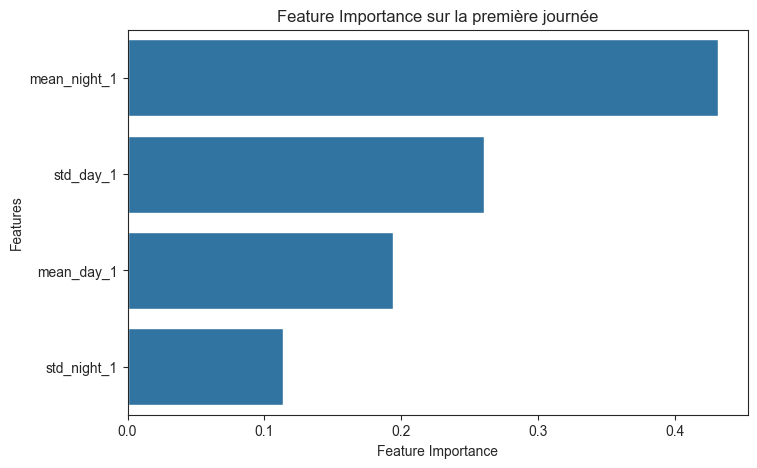

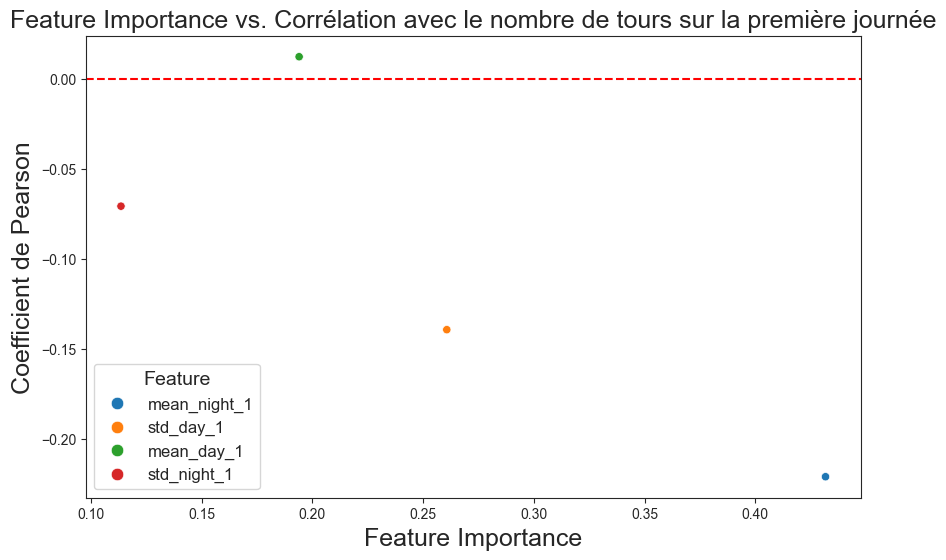

In [34]:
n_rider_1_day=((df["Laps"]>=24)==1).sum()

#Les hyperparamètres sont choisis pour éviter l'overfitting
rnd_clf = RandomForestRegressor(n_estimators=500, max_depth=3, min_samples_leaf=2, max_leaf_nodes=10,n_jobs=-1,min_samples_split=5, random_state=42)

#On choisit uniquement les variables du jour 1 et de la nuit 1
X_train=X.iloc[:n_rider_1_day,:-8]
y_train=y[:n_rider_1_day]
rnd_clf.fit(X_train, y_train)


# Visualisation de la feature importance et du coefficient de corrélation (Spearman pour autoriser des relations non linéaires)
feature_df = pd.DataFrame({"Feature": X_train.columns, "Importance": rnd_clf.feature_importances_,"Spearman Correlation": X_train.corrwith(y_train, method="spearman")})
feature_df = feature_df.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=feature_df["Importance"], y=feature_df["Feature"])
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance sur la première journée")
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=feature_df, x="Importance", y="Spearman Correlation", hue="Feature")
plt.axhline(0, color="red", linestyle="--")                   #separate positive/negative
plt.xlabel("Feature Importance",fontsize=18)
plt.ylabel("Coefficient de Pearson",fontsize=18)
plt.title("Feature Importance vs. Corrélation avec le nombre de tours sur la première journée",fontsize=18)
plt.legend(title="Feature", title_fontsize=14, fontsize=12, markerscale=1.5)
plt.savefig("../Reporting/images/feature1.png", dpi=300, bbox_inches="tight") 
plt.show()

Parmi les coureurs qui ont parcouru plus de 24 tours, le plus important pour atteindre un grand nombre de tours semble d'être rapide par rapport aux autres concurrents durant la première nuit (coefficient de corrélation négatif entre `mean_night_1` et `Laps`) et d'être régulier durant le premier jour (coefficient de corrélation négatif entre `std_day_1` et `Laps`). Cela semble plutôt cohérent pour le moment.

Maintenant, nous effectuons la même analyse mais pour les coureurs ayant effectué plus de 48 tours.

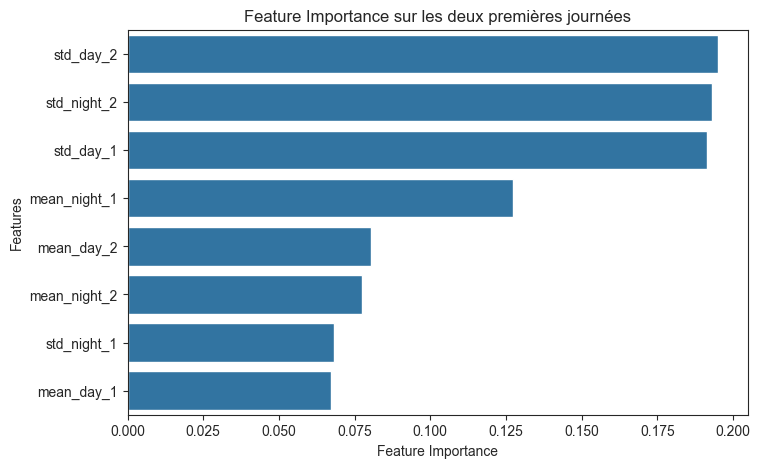

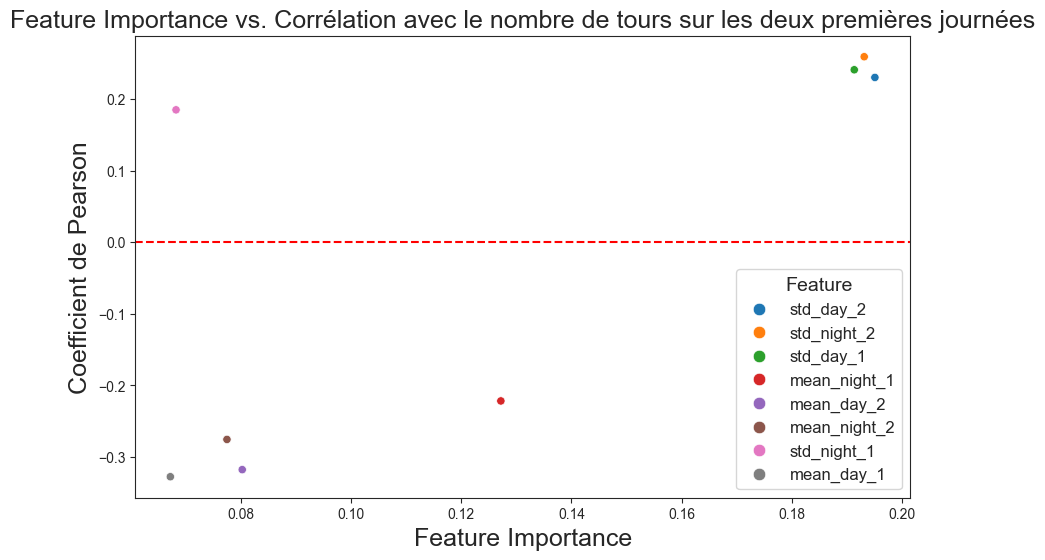

In [35]:
n_rider_2_days=((df["Laps"]>=48)==1).sum()

rnd_clf = RandomForestRegressor(n_estimators=500, max_depth=3,min_samples_leaf=2,max_leaf_nodes=10,n_jobs=-1,min_samples_split=5, random_state=42)
X_train=X.iloc[:n_rider_2_days,:-4]
y_train=y[:n_rider_2_days]
rnd_clf.fit(X_train, y_train)


feature_df = pd.DataFrame({"Feature": X_train.columns, "Importance": rnd_clf.feature_importances_,"Spearman Correlation": X_train.corrwith(y_train, method="spearman")})
feature_df = feature_df.sort_values(by="Importance", ascending=False)



plt.figure(figsize=(8, 5))
sns.barplot(x=feature_df["Importance"], y=feature_df["Feature"])
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance sur les deux premières journées")
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=feature_df, x="Importance", y="Spearman Correlation", hue="Feature")
plt.axhline(0, color="red", linestyle="--")                   #separate positive/negative
plt.xlabel("Feature Importance",fontsize=18)
plt.ylabel("Coefficient de Pearson",fontsize=18)
plt.title("Feature Importance vs. Corrélation avec le nombre de tours sur les deux premières journées",fontsize=18)
plt.legend(title="Feature", title_fontsize=14, fontsize=12, markerscale=1.5)
plt.savefig("../Reporting/images/feature2.png", dpi=300, bbox_inches="tight") 
plt.show()

Le résultat obtenu est plutôt surprenant. Tout d'abord, ce qui semble logique est le fait que les variables commençant par `mean` ont un coefficient de corrélation négatif: les coureurs les plus rapides semblent faire plus de tour, probablement car ils sont plus en forme que les autres. Par contre, à l'inverse de ce que laissait entrevoir le graphique précédent, les variables commençant par `std` ont toutes un coefficient de corrélation positif: plus on est irrégulier, plus on a de chances d'aller loin. De plus, c'est cette irrégularité qui semble plus importante plutôt que les moyennes des temps au tour. Plutôt contre-intuitif...

Enfin, nous effectuons cette même analyse pour les coureurs ayant fait plus de 72 tours. Qu'est ce qui distingue un très bon coureur d'un excellent coureur ?

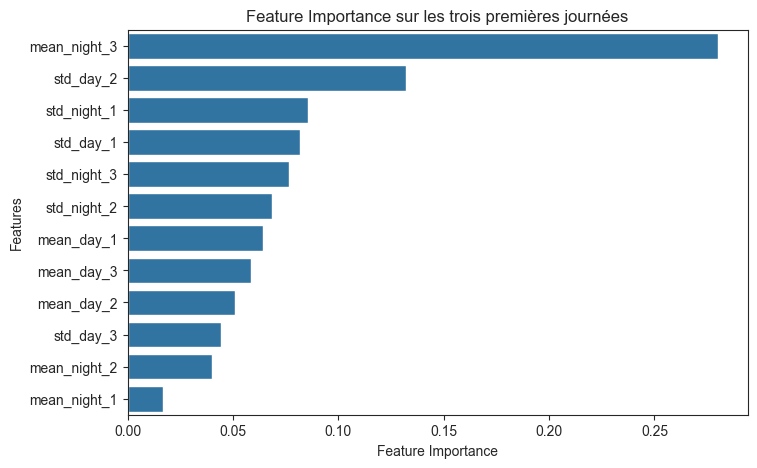

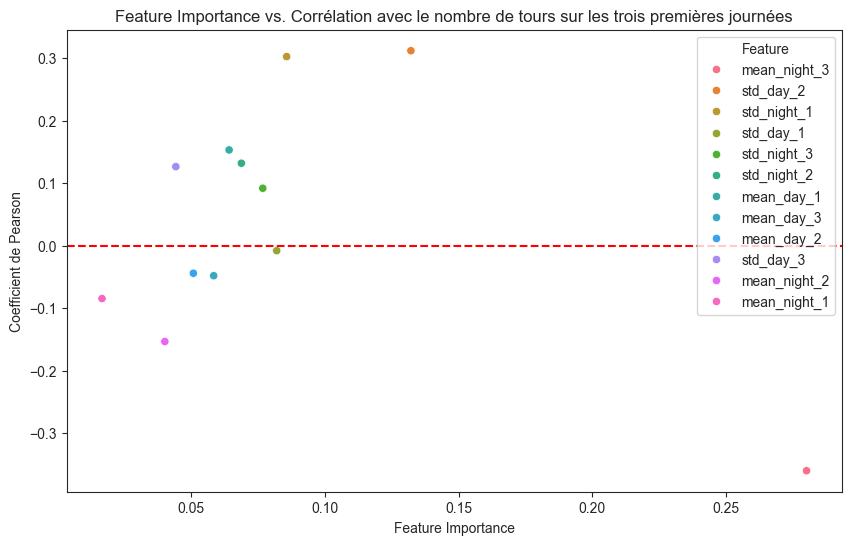

In [18]:
n_rider_3_days=((df["Laps"]>=72)==1).sum()

rnd_clf = RandomForestRegressor(n_estimators=500, max_depth=3,min_samples_leaf=2,max_leaf_nodes=10,n_jobs=-1,min_samples_split=5, random_state=42)
X_train=X.iloc[:n_rider_3_days,:]
y_train=y[:n_rider_3_days]
rnd_clf.fit(X_train, y_train)


feature_df = pd.DataFrame({"Feature": X_train.columns, "Importance": rnd_clf.feature_importances_,"Spearman Correlation": X_train.corrwith(y_train, method="spearman")})
feature_df = feature_df.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=feature_df["Importance"], y=feature_df["Feature"])
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance sur les trois premières journées")
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=feature_df, x="Importance", y="Spearman Correlation", hue="Feature")
plt.axhline(0, color="red", linestyle="--")                   #separate positive/negative
plt.xlabel("Feature Importance")
plt.ylabel("Coefficient de Pearson")
plt.title("Feature Importance vs. Corrélation avec le nombre de tours sur les trois premières journées")
plt.show()



Sans surprise, c'est la moyenne sur la troisième nuit qui est la plus importante: les coureurs encore frais sont capables de maintenir des vitesses élevées alors que ceux sur le point d'abandonner sont se battent pour survivre. Par contre, on retrouve l'idée émise précedemment: l'irrégularité semble être une clé pour aller loin... De plus, et c'est là où cela devient intéressant, le moment le plus important semble être la stratégie du jour 2.

Dans la prochaine section, nous essayons de décrypter les résultats obtenus.

# Analyse des temps par groupe

On classe maintenant les coureurs par groupe:
1. Groupe 1: 72 tours ou plus
2. Groupe 2: entre 48 et 71 tours
3. Groupe 3: entre 24 et 47 tours
4. Groupe 4: moins de 24 tours (uniquement 3 coureurs)

On distingue ensuite le top 10 du reste du groupe 1.

In [19]:
df["Group"]=df["Laps"].apply(lambda x: 1 if x>=72 else 2 if x>=48 else 3 if x>=24 else 4)
df["Top10"]=(df.index<11)

In [20]:
df.groupby("Group")[df.columns[-19:-2]].mean()

,mean_trail,std_trail,mean_road,std_road,mean_day_1,std_day_1,mean_night_1,std_night_1,mean_day_2,std_day_2,mean_night_2,std_night_2,mean_day_3,std_day_3,mean_night_3,std_night_3,std_combined
Group,,,,,,,,,,,,,,,,,
1,52.152976,2.770674,48.618926,3.373750,49.130435,1.775568,45.483556,1.925020,51.839328,1.523089,48.765217,1.973930,53.971871,1.107171,50.637659,2.092326,3.072212
2,52.848179,2.221439,48.838014,2.674212,51.069381,1.332980,47.022489,1.707854,53.144318,1.258785,50.253873,1.525668,55.476798,1.268413,53.525661,1.667275,2.447825
3,50.993639,3.242131,47.755731,2.471691,49.294848,2.247499,47.435573,2.131574,55.011030,1.374794,51.407217,1.470455,NaN,NaN,NaN,NaN,2.856911
4,50.675000,3.636284,NaN,NaN,50.675000,3.636284,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
df[df["Group"]==1].groupby("Top10")[df.columns[-19:-2]].mean()

,mean_trail,std_trail,mean_road,std_road,mean_day_1,std_day_1,mean_night_1,std_night_1,mean_day_2,std_day_2,mean_night_2,std_night_2,mean_day_3,std_day_3,mean_night_3,std_night_3,std_combined
Top10,,,,,,,,,,,,,,,,,
False,51.926705,2.856155,48.956660,3.298789,48.643124,1.743938,45.723274,1.714996,51.975175,1.437958,49.301381,1.910834,54.028438,1.049914,51.912781,2.002088,3.077472
True,52.447128,2.659549,48.179872,3.471201,49.763939,1.816687,45.171923,2.198052,51.662727,1.633758,48.068205,2.055955,53.898333,1.181605,48.980000,2.209635,3.065375


Voici les enseignements que l'on peut tirer:
1. Durant le `day_1`, les groupes 1 et 3 ont une vitesse similaire mais le groupe 3 est plus irrégulier. Le groupe 2 est lui plus lent et beaucoup plus régulier.
2. Durant la `night_1`, le groupe 1 est plus rapide que les autres. On retrouve la même hiérarchie concernant les écarts-types. Cela correspond à la première analyse de feature importance effectuée. Les coureurs irréguliers sont ceux du groupe 3, ceux qui vont le plus vite abandonner.
3. Durant le `day_2`, on retrouve la même hiérarchie que lors du `day_1`pour les groupes 1 et 2. Nous n'analysons pas les données du groupe 3 car certains vont abandonner durant cette journée.
4. Durant la `night_2`, c'est également la même hiérarchie.
5. Concernant la distinction entre le top 10 et le reste du groupe 1, le top 10 semble être un peu plus lent le `day_1` et toujours plus rapide la nuit. De plus , il est toujours plus irrégulier.

Nous allons maintenant analyser graphiquement les moyennes des temps au tour de chaque groupe.

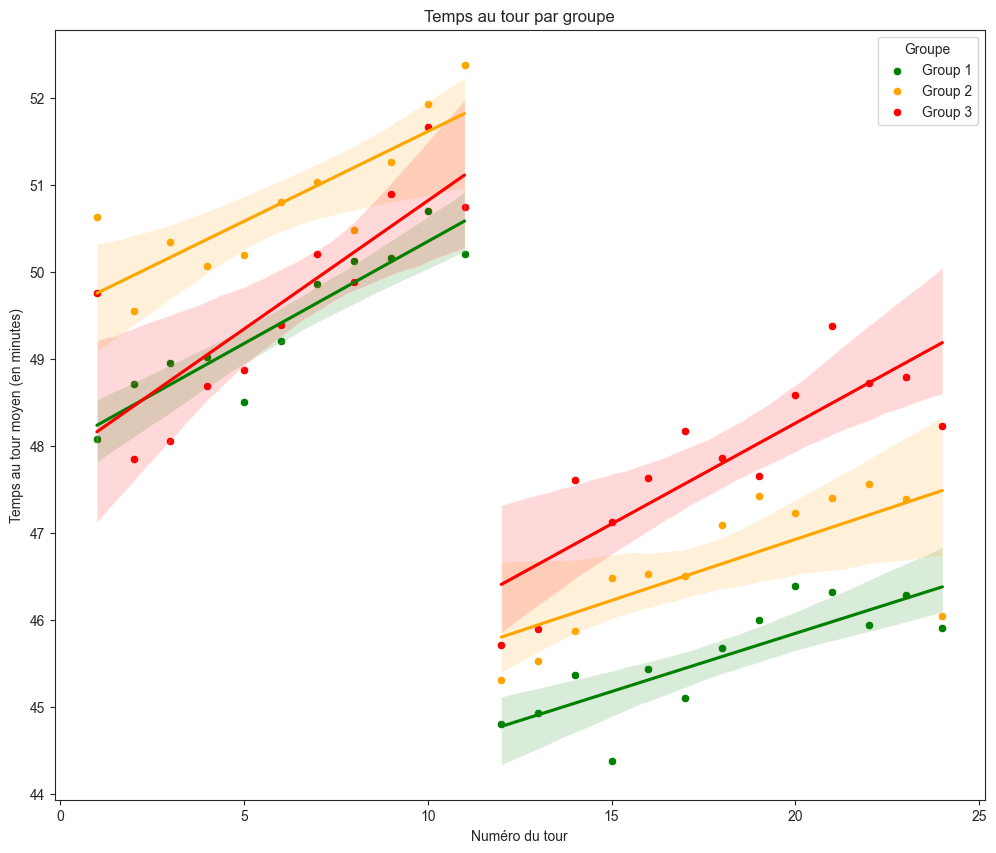

In [22]:
#First 24 hours
fig, ax = plt.subplots(figsize=(12, 10))
values=(df.groupby("Group")[df.columns[9:33]].mean()/60).loc[:3]

colors=["green","orange","red"]

# Plot each group's lap times
for (group_name, row), color in zip(values.iterrows(), colors):
    sns.scatterplot(x=range(1, 25), y=row, label=f"Group {group_name}",color=color)
    sns.regplot(x=np.arange(1, 12), y=row[:11],scatter=False,color=color)
    sns.regplot(x=np.arange(12, 25), y=row[11:],scatter=False,color=color)

# Formatting
ax.set_title("Temps au tour par groupe")
ax.set_xlabel("Numéro du tour")
ax.set_ylabel("Temps au tour moyen (en minutes)")
ax.legend(title="Groupe")

plt.show()

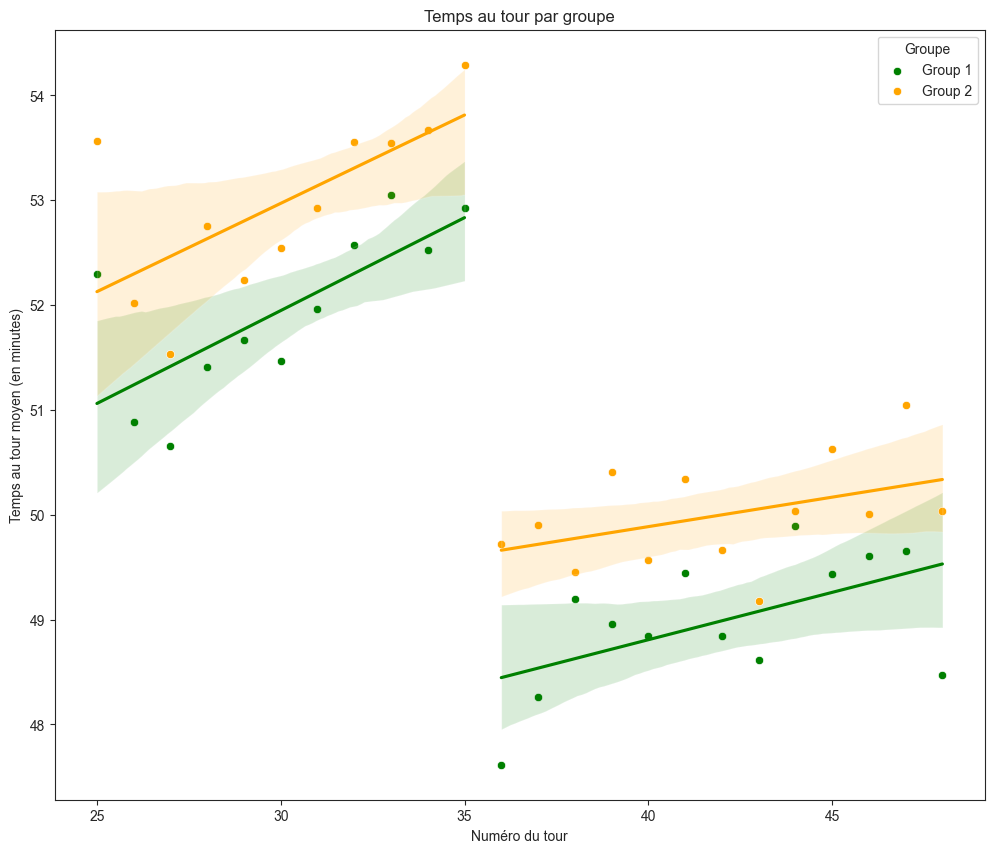

In [23]:
#Second day
fig, ax = plt.subplots(figsize=(12, 10))
values=(df.groupby("Group")[df.columns[33:57]].mean()/60).loc[:2]

colors=["green","orange"]

# Plot each group's lap times
for (group_name, row), color in zip(values.iterrows(), colors):
    sns.scatterplot(x=range(25,49), y=row, label=f"Group {group_name}",color=color)
    sns.regplot(x=np.arange(25, 36), y=row[:11],scatter=False,color=color)
    sns.regplot(x=np.arange(36, 49), y=row[11:],scatter=False,color=color)

# Formatting
ax.set_title("Temps au tour par groupe")
ax.set_xlabel("Numéro du tour")
ax.set_ylabel("Temps au tour moyen (en minutes)")
ax.legend(title="Groupe")

plt.show()

    




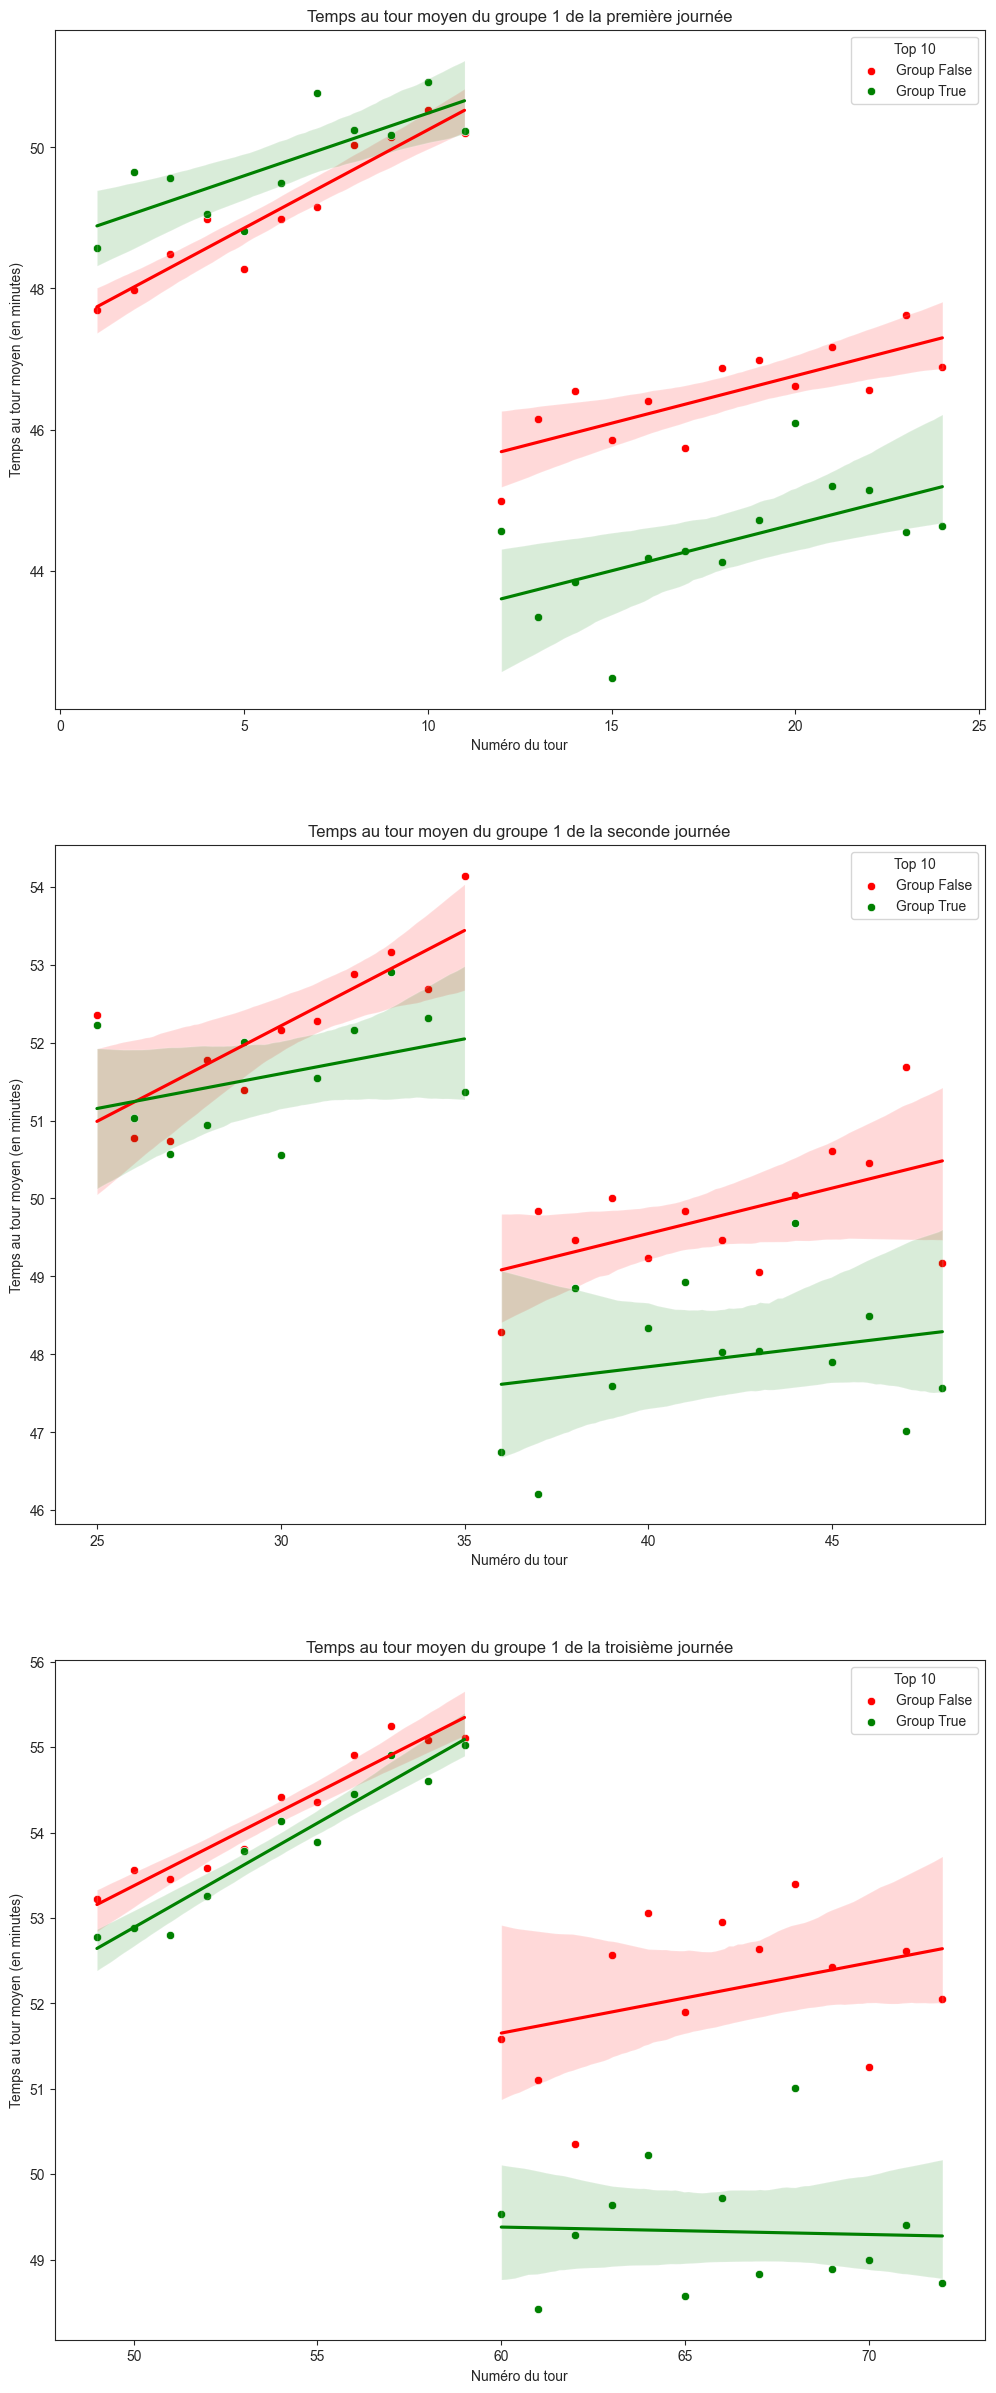

In [24]:
#Analyse du groupe 1 selon Top 10 ou non
fig, axes = plt.subplots(3,1,figsize=(12, 30))
values=(df[:23].groupby("Top10")[df.columns[9:81]].mean()/60)

colors=["red","green"]

# Plot each group's lap times
for (group_name, row), color in zip(values.iterrows(), colors):
    sns.scatterplot(x=range(1, 25), y=row[:24], label=f"Group {group_name}",color=color,ax=axes[0])
    sns.regplot(x=np.arange(1, 12), y=row[:11],scatter=False,color=color,ax=axes[0])
    sns.regplot(x=np.arange(12, 25), y=row[11:24],scatter=False,color=color,ax=axes[0])
    sns.scatterplot(x=range(25,49), y=row[24:48], label=f"Group {group_name}",color=color,ax=axes[1])
    sns.regplot(x=np.arange(25, 36), y=row[24:35],scatter=False,color=color,ax=axes[1])
    sns.regplot(x=np.arange(36, 49), y=row[35:48],scatter=False,color=color,ax=axes[1])
    sns.scatterplot(x=range(49,73), y=row[48:72], label=f"Group {group_name}",color=color,ax=axes[2])
    sns.regplot(x=np.arange(49, 60), y=row[48:59],scatter=False,color=color,ax=axes[2])
    sns.regplot(x=np.arange(60, 73), y=row[59:72],scatter=False,color=color,ax=axes[2])

# Formatting

axes[0].set_title("Temps au tour moyen du groupe 1 de la première journée")
axes[1].set_title("Temps au tour moyen du groupe 1 de la seconde journée")
axes[2].set_title("Temps au tour moyen du groupe 1 de la troisième journée")
for ax in axes:
    ax.set_xlabel("Numéro du tour")
    ax.set_ylabel("Temps au tour moyen (en minutes)")
    ax.legend(title="Top 10")

plt.show()
    

    





# Décryptage et analyse finale

## Quelle stratégie adopter pour faire plus de 48 heures ?

D'après la première analyse de feature importance, parmi les coureurs qui ont effectué plus de 24 tours, ce qui semblait déterminant pour aller loin était d'être très régulier, viser un temps autour de 50 minutes pour la partie trail et 45 minutes pour la partie route, du moins la première journée. Cela reste une allure acceptable que des athlètes performants peuvent maintenir très longtemps et laisse un peu de temps de repos au camp. On a vu que la régularité permet de passer d'une performance entre 24 et 47 tours à une performance de plus de 48 tours, cependant, est-ce la bonne stratégie pour jouer la gagne ?

## Quelle stratégie pour gagner ?

Lorsque l'on ignore les coureurs ayant effectué moins de 48 tours, les résultats obtenus sont plutôt différents. On se rend compte que les coureurs ayant été le plus irrégulier sont les meilleurs. Mon interprétation est que le fait d'être irrégulier implique que certains tours sont relativement rapides, ce qui laisse plus de temps de repos qui permet de bien s'alimenter, changer ses vêtements, mais surtout dormir ! Certains coureurs arrivent à s'adapter au manque de sommeil pendant 24 heures, 48 heures... Mais faire plus de 72 heures parait presque insurmontable. Les minutes de sommeil engrangées durant les premiers jours seront déterminantes pour une course qui dure plus de 100 heures. Je pense donc que pour gagner, il faut tout de même être assez régulier mais incorporer des tours beaucoup plus rapides qui permettent de prendre plus de temps de repos, notamment la nuit car le circuit y est plus rapide. Cependant, trop d'efforts rapides entraineraient un épuisement donc ces tours rapides sont à compenser avec des tours plus lents, d'où l'irrégularité.

## Mon avis personnel et ma stratégie

Voici la stratégie que j'adopterais:
1. Jour 1: Tours réguliers autour de 50 minutes avec 2 tours plus rapides (45 minutes) pour avoir des pauses plus longues pour bien s'alimenter, se changer... Compenser les tours rapides par des tours plus lents (53-54 minutes)
2. Nuit 1: Tours réguliers autour de 45 minutes avec 3 tours plus rapides (38-40 minutes) pour s'accorder plusieurs micro-siestes. C'est assez risqué mais pour jouer la victoire, ce sont les minutes de sommeil accumulées qui feront la différence. Compenser avec des tours plus lents (47-49) minutes.
3. Jour 2: Tours autour de 52 minutes. Même stratégie avec deux tours plus rapides (47 minutes) pour les mêmes raisons.
4. Nuit 2: Tours autour de 48 minutes avec 3 tours rapides à 42-43 minutes pour les mêmes raisons.
5. Jours suivants: la fatigue limite les temps au tour aux alentours de 54-55 minutes. Incorporer un tour plus rapide (50 minutes) si possible pour une bonne alimentation.
6. Nuits suivantes: la fatigue limite les temps au tour aux alentours de 50 minutes. Incorporer un ou deux tours plus rapides (45 minutes) pour le sommeil si possible.

# Limites de l'analyse

L'échantillon de coureurs étant assez faible, il faut prendre cette analyse avec précaution. On pourra comparer les résultats avec les prochains championnats du monde solo en 2025. Les championnats du monde par équipe de 2024 proposaient un nombre de coureurs plus importants, mais les données des temps au tour ne sont pas aussi facilement accessibles et le circuit était différent selon les équipes.

# Préparation des visualisations pour la partie reporting

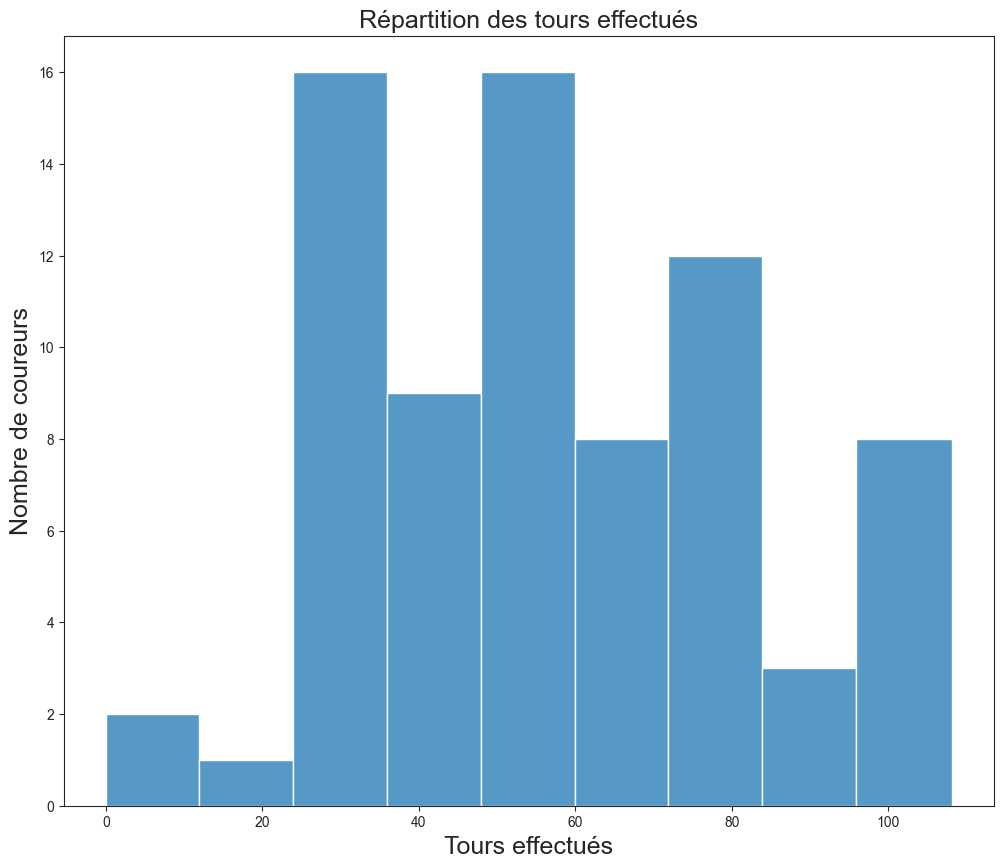

In [25]:
fig, ax = plt.subplots(figsize=(12, 10))

sns.histplot(df['Laps'], bins=[0,11.9,23.9,35.9,47.9,59.9,71.9,83.9,95.9,108.1],ax=ax)  
ax.set_xlabel("Tours effectués",fontsize=18)
ax.set_ylabel("Nombre de coureurs",fontsize=18)
ax.set_title("Répartition des tours effectués",fontsize=18)

plt.savefig("../Reporting/images/histogram.png", dpi=300, bbox_inches="tight") 

plt.show()

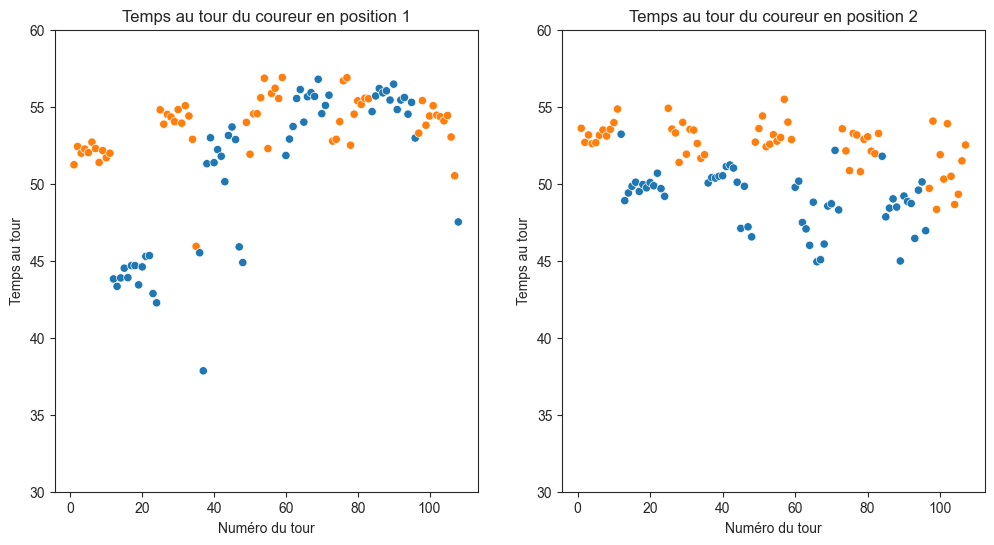

In [26]:
plot_multiple_rider_times([1,2])

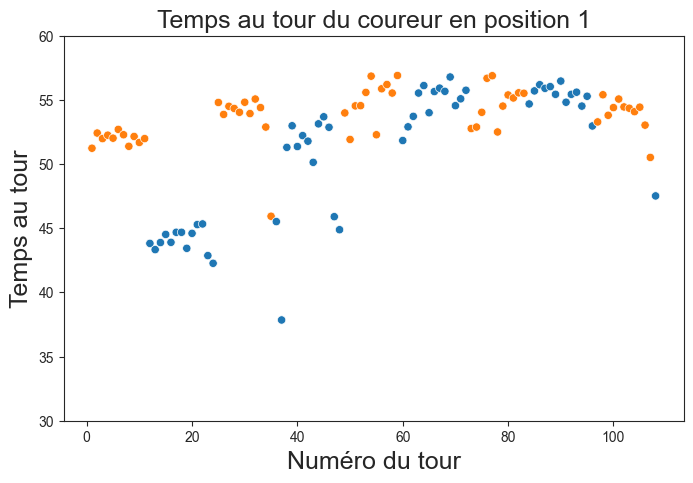

In [27]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.scatterplot(x=range(1,109), y=df.iloc[0,9:117]/60, hue=is_trail, legend=False,ax=ax)
# Formatting the plot
ax.set_xlabel("Numéro du tour",fontsize=18)
ax.set_ylabel("Temps au tour",fontsize=18)
ax.set(ylim=(30, 60))
ax.set_title("Temps au tour du coureur en position 1",fontsize=18);
plt.savefig("../Reporting/images/tempstour1.png", dpi=300, bbox_inches="tight") 

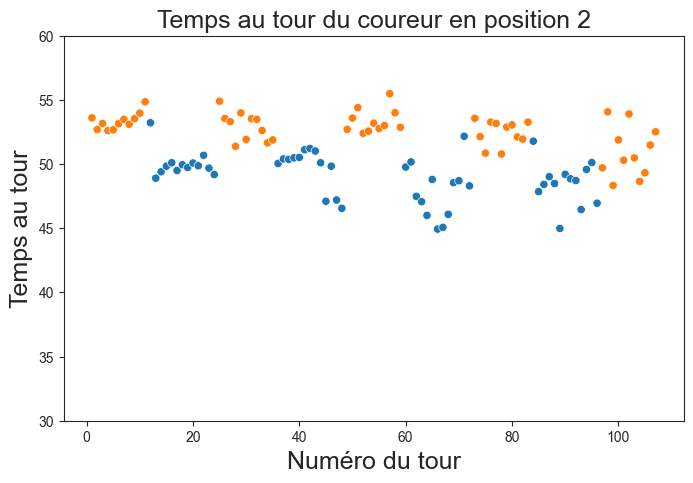

In [28]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.scatterplot(x=range(1,109), y=df.iloc[1,9:117]/60, hue=is_trail, legend=False,ax=ax)
# Formatting the plot
ax.set_xlabel("Numéro du tour",fontsize=18)
ax.set_ylabel("Temps au tour",fontsize=18)
ax.set(ylim=(30, 60))
ax.set_title("Temps au tour du coureur en position 2",fontsize=18);
plt.savefig("../Reporting/images/tempstour2.png", dpi=300, bbox_inches="tight") 

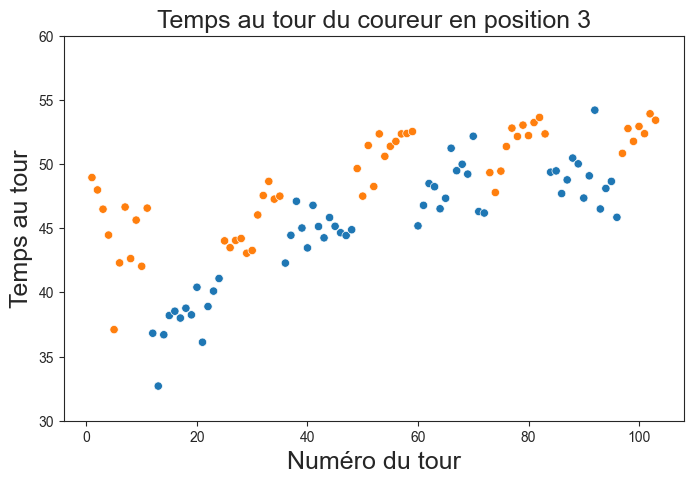

In [29]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.scatterplot(x=range(1,109), y=df.iloc[2,9:117]/60, hue=is_trail, legend=False,ax=ax)
# Formatting the plot
ax.set_xlabel("Numéro du tour",fontsize=18)
ax.set_ylabel("Temps au tour",fontsize=18)
ax.set(ylim=(30, 60))
ax.set_title("Temps au tour du coureur en position 3",fontsize=18);
plt.savefig("../Reporting/images/tempstour3.png", dpi=300, bbox_inches="tight") 

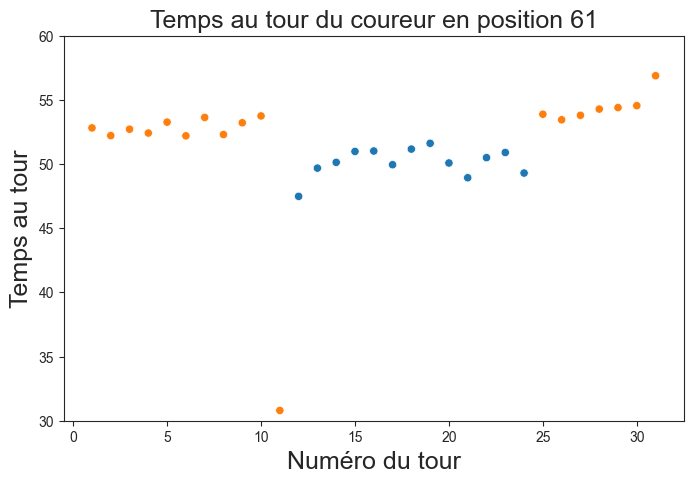

In [30]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.scatterplot(x=range(1,109), y=df.iloc[60,9:117]/60, hue=is_trail, legend=False,ax=ax)
# Formatting the plot
ax.set_xlabel("Numéro du tour",fontsize=18)
ax.set_ylabel("Temps au tour",fontsize=18)
ax.set(ylim=(30, 60))
ax.set_title("Temps au tour du coureur en position 61",fontsize=18);
plt.savefig("../Reporting/images/tempstour61.png", dpi=300, bbox_inches="tight") 